In [3]:
import yfinance as yf
import pandas as pd
import matplotlib as plt

In [91]:
ticker = "AAPL"
data = yf.download(ticker, start="2021-01-01", end="2024-12-31")
data["Close"]

[*********************100%***********************]  1 of 1 completed


Ticker,AAPL
Date,
2021-01-04,126.405243
2021-01-05,127.968063
2021-01-06,123.660484
2021-01-07,127.880196
2021-01-08,128.983948
...,...
2024-12-23,254.989655
2024-12-24,257.916443
2024-12-26,258.735504


<Axes: title={'center': 'AAPL closing price'}, xlabel='Date'>

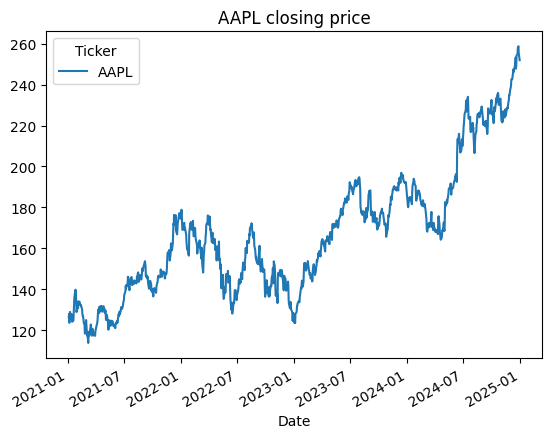

In [89]:
data["Close"].plot(title=f"{ticker} closing price")

In [93]:
data["SMA_20"] = data["Close"].rolling(window=20).mean()

In [94]:
data["Signal"] = [0]*len(data["SMA_20"])

In [106]:
data["Signal"] = (data["SMA_20"] > data["Close"]["AAPL"]).astype(int)

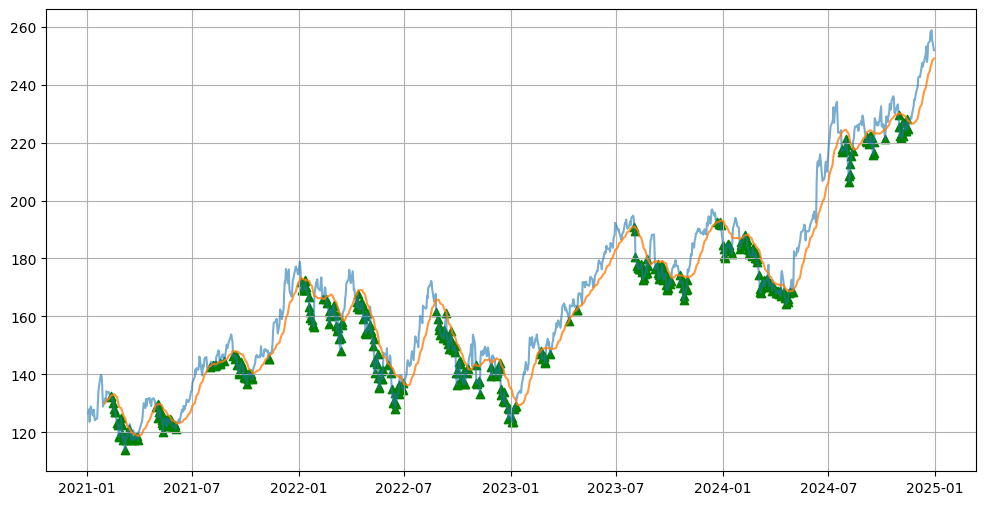

In [115]:
plt.figure(figsize=(12,6))
plt.plot(data["Close"], label="Close Price", alpha=0.6)
plt.plot(data["SMA_20"], label="20-Day SMA", alpha=0.8)
plt.scatter(data[data["Signal"] == 1].index, data[data["Signal"] == 1]["Close"],
            label="Buy Signal", marker="^", color="green")
plt.grid(True)
plt.show()

In [108]:
data["Position"] = data["Signal"].shift()

In [110]:
data["Daily Return"] = data["Close"].pct_change()
data["Daily Return"]

Date
2021-01-04         NaN
2021-01-05    0.012364
2021-01-06   -0.033661
2021-01-07    0.034123
2021-01-08    0.008631
                ...   
2024-12-23    0.003065
2024-12-24    0.011478
2024-12-26    0.003176
2024-12-27   -0.013242
2024-12-30   -0.013263
Name: Daily Return, Length: 1004, dtype: float64

In [112]:
data["Strategy Return"] = data["Daily Return"] * data["Position"]
data["Strategy Return"]

Date
2021-01-04    NaN
2021-01-05    0.0
2021-01-06   -0.0
2021-01-07    0.0
2021-01-08    0.0
             ... 
2024-12-23    0.0
2024-12-24    0.0
2024-12-26    0.0
2024-12-27   -0.0
2024-12-30   -0.0
Name: Strategy Return, Length: 1004, dtype: float64

<Axes: xlabel='Date'>

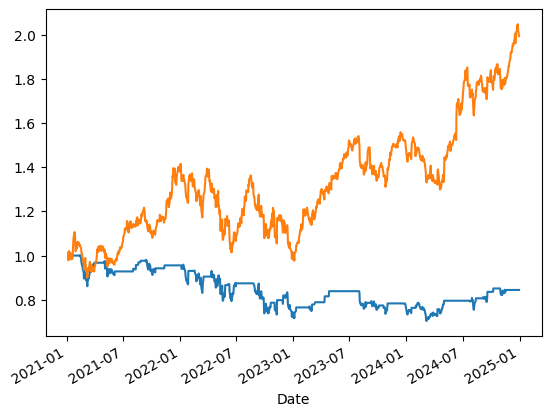

In [120]:
(1 + data["Strategy Return"]).cumprod().plot(label="Strategy")
(1 + data["Daily Return"]).cumprod().plot(label="Buy & Hold")